# Detección de pose
 ![marcadores](pose_landmarks.png)

In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

MODEL_PATH = "models/pose_landmarker_lite.task"
base_options = python.BaseOptions(model_asset_path=MODEL_PATH)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)


2023-07-21 21:01:44.112120: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 21:01:44.133496: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 21:01:44.133928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 21:01:44.610061: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [3]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'numpy.ndarray'> uint8 [255 255 255]
<class 'numpy.ndarray'> uint8 [255 255 255]


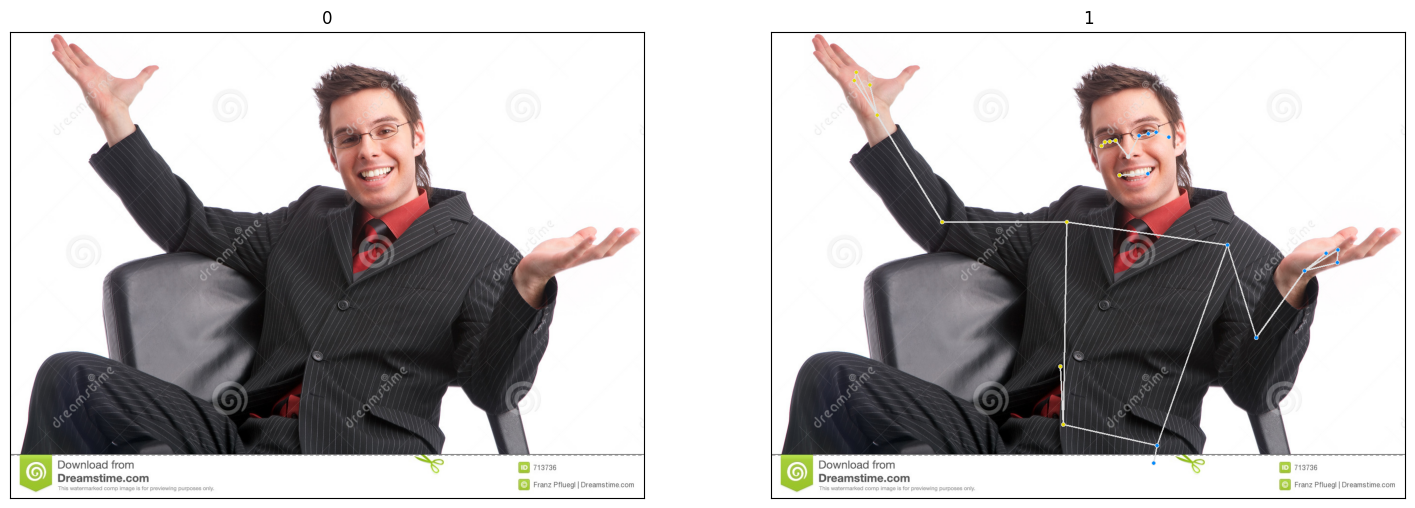

In [10]:
image = mp.Image.create_from_file("person.jpg")

detection_result = detector.detect(image)

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)


display_color_row(image.numpy_view(), annotated_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'> uint8 [255 255 255]
<class 'numpy.ndarray'> float32 [1.7652169e-25 1.7652169e-25 1.7652169e-25]


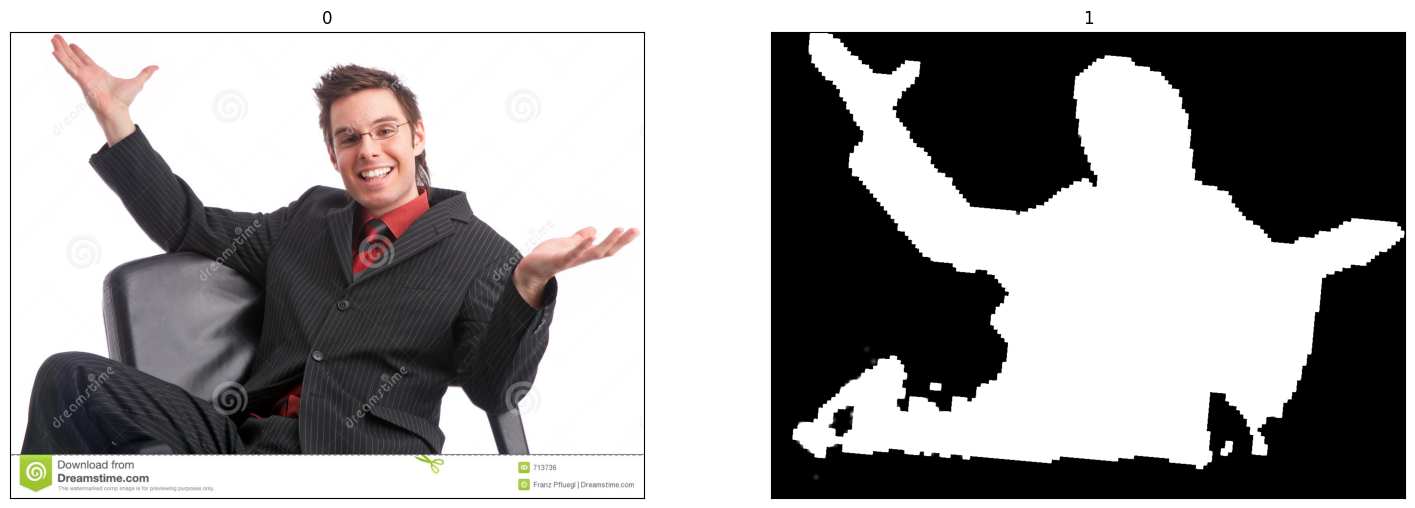

In [11]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
display_color_row(image.numpy_view(), visualized_mask)